# Combine Features

## Libs Sections 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_context('talk')
import cartopy.crs as ccrs
import cartopy.feature as cf


import glob

import tobac
import sys
import json




## Arguments

In [2]:
if 'launcher' in sys.argv[0]:
    config_file = '../scripts/config/config_precip500.json'
    date = '202006'
    interactive = True
else:
    config_file = sys.argv[1]
    date = sys.argv[2]
    interactive = False

## Configuration

In [3]:
with open(config_file, "r") as fp:
    conf = json.load(fp)
globals().update(conf)

## Input Data 

In [9]:
main_dir = "/work/bb1376/user/fabian/data/oxford-hackathon"
subname = f"{vname}_features_thresh{threshold}"

input_dir = f"/{main_dir}/{model}/{experiment}/{subname}"

#precip_features_thresh50_icon-hamlite_20200630T0045.nc
filelist = sorted( glob.glob( f'{input_dir}/{subname}*_{date}??T????.nc' ))

In [10]:
feature_list = []

for fname in filelist:

    print(f'...open {fname}')
    xfeat = xr.open_dataset( fname )
    features = xfeat.to_pandas()
    
    feature_list += [ features.copy(), ]
    

...open //work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/precip_features_thresh500_icon-hamlite_20200601T0000.nc
...open //work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/precip_features_thresh500_icon-hamlite_20200601T0015.nc
...open //work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/precip_features_thresh500_icon-hamlite_20200601T0030.nc
...open //work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/precip_features_thresh500_icon-hamlite_20200601T0045.nc
...open //work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/precip_features_thresh500_icon-hamlite_20200601T0100.nc
...open //work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/precip_features_thresh500/precip_features_thresh500_icon-hamlite_20200601T0115.n

In [11]:
features = tobac.utils.general.combine_feature_dataframes( feature_list )
xfeat = features.to_xarray()

## Plotting 

In [ ]:
if interactive:
    
    size = np.sqrt( xfeat['area'].data / 1e6 )
    mag = xfeat['max'].data
    
    h, xe, p = plt.hist( mag, 10, log = True)

Text(0.5, 1.0, 'Distribution of precip. cells (> 50 mm day${}^{-1}$) for 202006')

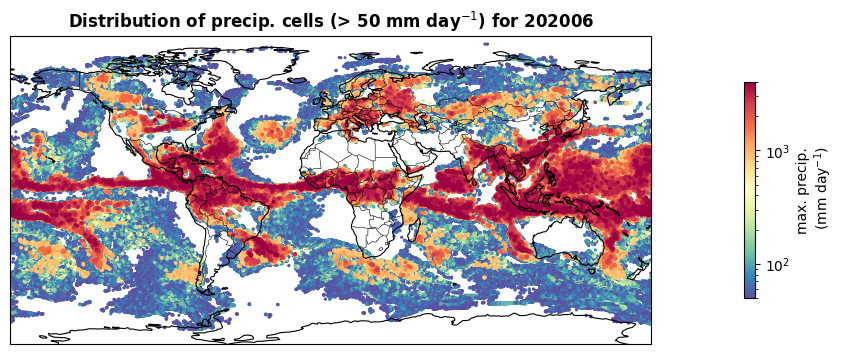

In [19]:
if interactive:
    target_map = ccrs.PlateCarree()
    fig, axs = plt.subplots(ncols=1, nrows = 1, subplot_kw={'projection': target_map}, figsize = (24,4))
    plt.sca( axs ) #[0] )
    
    x = xfeat.longitude.data
    y = xfeat.latitude.data
    
    for i  in range( len(xe) - 1):
        v1 = xe[i]
        v2 = xe[i+1]
        
        m = (mag > v1) & (mag <= v2 )
        unit = 'mm day${}^{-1}$'
        plt.scatter( x[m],y[m], c = mag[m], s = np.log(size[m]), cmap = plt.cm.Spectral_r, 
                    norm = plt.matplotlib.colors.LogNorm(vmin = 50., vmax = 4000.) )
    plt.colorbar( shrink = 0.7, label = f'max. precip.\n ({unit})' )
#    xfeat.plot.scatter( x = 'longitude', y = 'latitude', markersize =size, 
#                       transform=ccrs.PlateCarree(),  # the data's projection
#            subplot_kws={"projection": target_map},)
    
    ax = plt.gca()
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
    ax.set_title(f'Distribution of precip. cells (> 50 {unit}) for {date}', fontweight = 'bold') 
    
    # plt.savefig(f'../pics/map_precip_cells_thresh50_{date}.jpg')

## Output 

In [12]:
outfile = f'{input_dir}/monthly_{subname}_{date}.nc'
xfeat.to_netcdf( outfile )